## Rubik's Cube Representation

A standard rubik's cube has 6 faces with 3x3 squares. Each face can be represented using a numpy array, with the ordering 
$$(front, up, down, left, right, top, bottom)$$
Each cube operation rotates one face $\pm90^\circ$. One way to do this is to use quaternions to define rotations in 3-dimensional space.

In [8]:
from Cube import RubiksCube
import pandas as pd
import itertools
import numpy as np
%matplotlib inline
%load_ext autoreload

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [4]:
%autoreload 2

In [2]:
from Solver import SingleMoveScorer

In [9]:
c = RubiksCube(3)
c.rotate_cube(2,1,-1)

In [25]:
[(0,0,-1) == x for x in c.rots]

[True,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False]

In [17]:
?np.argwhere

Signature: np.argwhere(a)
Docstring:
Find the indices of array elements that are non-zero, grouped by element.

Parameters
----------
a : array_like
    Input data.

Returns
-------
index_array : ndarray
    Indices of elements that are non-zero. Indices are grouped by element.

See Also
--------
where, nonzero

Notes
-----
``np.argwhere(a)`` is the same as ``np.transpose(np.nonzero(a))``.

The output of ``argwhere`` is not suitable for indexing arrays.
For this purpose use ``where(a)`` instead.

Examples
--------
>>> x = np.arange(6).reshape(2,3)
>>> x
array([[0, 1, 2],
       [3, 4, 5]])
>>> np.argwhere(x>1)
array([[0, 2],
       [1, 0],
       [1, 1],
       [1, 2]])
File:      /usr/local/lib/python3.5/dist-packages/numpy/core/numeric.py
Type:      function


In [15]:
np.argwhere(c._cube.reshape(6,3,3))

ValueError: total size of new array must be unchanged

In [63]:
b=np.sum(c._cube.reshape(6,6,9),axis=2)

In [69]:
b2=np.sum(c._cube.reshape(6,6,9),axis=2)

In [68]:
c.rotate_cube(2,0,-1)

In [66]:
np.max(b,axis=1)

array([6, 9, 9, 6, 6, 6])

In [70]:
np.max(b2,axis=1)

array([4, 6, 6, 6, 6, 4])

In [72]:
np.max(b2,axis=1)-np.max(b,axis=1)

array([-2, -3, -3,  0,  0, -2])

In [1]:
from CubeEnv import *
from JSAnimation.IPython_display import display_animation
from matplotlib import animation
import matplotlib.pyplot as plt
from IPython.display import display

e = CubeEnv()
frames = []
for t in range(100):
    frames.append(e.render(mode="rgb_array"))
    action = e.action_space.sample()
    e.step(action)
    
e.render(close=True)

def display_frames_as_gif(frames):
    """
    Displays a list of frames as a gif, with controls
    """
    e.cube.show_layout(frames[0])

    def animate(i):
        e.cube.update_plot(frames[i])
    anim = animation.FuncAnimation(plt.gcf(), animate, frames = len(frames), interval=50)
    display(display_animation(anim, default_mode='loop'))

In [3]:
from gym import Env

In [4]:
??Env

Init signature: Env(*args, **kwargs)
Source:        
class Env(object):
    """The main OpenAI Gym class. It encapsulates an environment with
    arbitrary behind-the-scenes dynamics. An environment can be
    partially or fully observed.

    The main API methods that users of this class need to know are:

        step
        reset
        render
        close
        seed

    When implementing an environment, override the following methods
    in your subclass:

        _step
        _reset
        _render
        _close
        _seed

    And set the following attributes:

        action_space: The Space object corresponding to valid actions
        observation_space: The Space object corresponding to valid observations
        reward_range: A tuple corresponding to the min and max possible rewards

    Note: a default reward range set to [-inf,+inf] already exists. Set it if you want a narrower range.

    The methods are accessed publicly as "step", "reset", etc.. The
    non-un

In [5]:
c = RubiksCube

## How Many Rotations are Needed?

Starting from an initial solved cube, I'll rotate the cube a fixed number of times and look at the distribution of their similarity to the intial state

In [88]:
n_samps = 10000
n_rots = 100
l=[]
for x in range(n_samps):
    c = RubiksCube()
    for y in range(n_rots):
        c.random_rotate()
        l.append((y,c.score_similarity()))
rot_df = pd.DataFrame(l,columns={"Rotations","Score"})

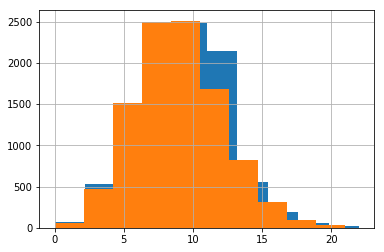

In [93]:
rot_df[rot_df["Rotations"]==50]["Score"].hist()

rot_df[rot_df["Rotations"]==99]["Score"].hist()

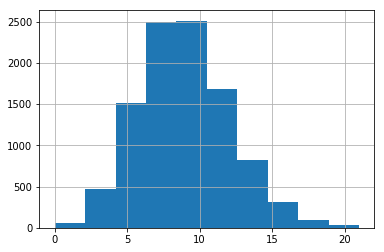

In [94]:
rot_df[rot_df["Rotations"]==99]["Score"].hist()